In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd
import numpy as np
import path

In [3]:
project_path = "D:\Projects\SMS Spam\\"
data_path = "SMSSpamCollection.txt"
f = open(project_path + data_path, "r")

In [4]:
contents = f.read()

In [5]:
data = contents.split("\n")

In [6]:
msg = []
label = []

for d in data:
    try :
        _label, _msg = d.split("\t")
        msg.append(_msg)
        if _label == "ham":
            label.append(0)
        else:
            label.append(1)
    except Exception as e:
        print(e)

not enough values to unpack (expected 2, got 1)


In [7]:
print(len(msg))

5574


In [8]:
print(len(label))

5574


In [9]:
train_msg = []
test_msg = []
train_label = []
test_label = []

In [10]:
temp =  np.random.rand(5574) < 0.8

In [11]:
for i in range(temp.shape[0]):
    if temp[i] == True:
        train_msg.append(msg[i])
        train_label.append(label[i])
    else:
        test_msg.append(msg[i])
        test_label.append(label[i])

In [12]:
len(test_msg)
print(test_label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [13]:
len(train_msg)

4473

In [14]:
tokenizer = Tokenizer(oov_token="_oov_")
tokenizer.fit_on_texts(train_msg)

In [15]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

7960


In [16]:
train_sequence = []
for _msg in train_msg:
    token_list = tokenizer.texts_to_sequences([_msg])[0]
    train_sequence.append(token_list)
    
test_sequence = []
for _msg in test_msg:
    token_list = tokenizer.texts_to_sequences([_msg])[0]
    test_sequence.append(token_list)

In [17]:
max_sequence_len = max([len(x) for x in train_sequence])

In [18]:
print(max_sequence_len)
print(train_sequence)

189
[[48, 459, 3824, 719, 677, 678, 67, 10, 1257, 86, 125, 346, 1130, 150, 2618, 1258, 68, 58, 3825, 146], [53, 504, 10, 21, 5, 762, 1023, 3, 177, 1671, 1417, 649, 2025, 2619, 255, 2026, 71, 1671, 3, 1672, 3, 333, 504, 524, 1131, 72, 406, 174, 570, 394, 2620], [7, 204, 148, 24, 395, 2621, 7, 139, 151, 56, 148], [1132, 2, 89, 95, 78, 424, 3, 857, 78, 1673, 213, 129, 443], [806, 126, 68, 1418, 144, 101, 160, 1674, 22, 8, 39, 374, 98, 858, 57, 110, 375, 4, 46, 13, 15, 82, 2027, 43, 425, 1131, 3826, 3, 69, 315, 220, 3, 2622], [720, 85, 5, 1024, 444, 261, 4, 17, 101, 460, 3, 2623, 1419, 175, 1133, 3, 133, 18, 2624, 133, 376, 2625, 571, 1134, 572, 67], [127, 14, 104, 679, 938, 27, 140, 7, 74, 1135, 3, 445, 3, 6, 316, 525, 859, 37, 297, 13, 53, 18, 6, 104, 445, 241, 53, 20, 2626], [32, 209, 35, 83, 246, 8, 2, 89, 70, 3, 317, 79, 41, 327, 1025, 242, 100, 205, 3827, 526, 91], [1675, 2627, 3, 177, 172, 50, 721, 3, 1026, 407, 573, 72, 2628, 8, 69, 3, 1676, 396, 180, 64, 2629, 251, 2630, 394, 96, 

In [19]:
train_sequence = np.array(pad_sequences(train_sequence, maxlen=max_sequence_len, padding='post'))
test_sequence = np.array(pad_sequences(test_sequence, maxlen=max_sequence_len, padding='post'))

train_label = np.array(train_label)
test_label = np.array(test_label)


In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 10, input_length = max_sequence_len))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 10)           79600     
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               24400     
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 105,021
Trainable params: 105,021
Non-trainable params: 0
_________________________________________________________________


In [22]:
# adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(train_sequence, train_label, epochs=20, verbose=1, validation_data=(test_sequence, test_label))

Epoch 1/20
140/140 [==============================] - 8s 55ms/step - loss: 0.2883 - accuracy: 0.9016 - val_loss: 0.1269 - val_accuracy: 0.9728
Epoch 2/20
140/140 [==============================] - 7s 49ms/step - loss: 0.0909 - accuracy: 0.9823 - val_loss: 0.0878 - val_accuracy: 0.9800
Epoch 3/20
140/140 [==============================] - 7s 48ms/step - loss: 0.0556 - accuracy: 0.9913 - val_loss: 0.0740 - val_accuracy: 0.9809
Epoch 4/20
140/140 [==============================] - 7s 48ms/step - loss: 0.0387 - accuracy: 0.9949 - val_loss: 0.0653 - val_accuracy: 0.9818
Epoch 5/20
140/140 [==============================] - 7s 49ms/step - loss: 0.0309 - accuracy: 0.9958 - val_loss: 0.0631 - val_accuracy: 0.9809
Epoch 6/20
140/140 [==============================] - 7s 48ms/step - loss: 0.0219 - accuracy: 0.9984 - val_loss: 0.0671 - val_accuracy: 0.9791
Epoch 7/20
140/140 [==============================] - 7s 48ms/step - loss: 0.0161 - accuracy: 0.9991 - val_loss: 0.0585 - val_accuracy: 0.9827

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

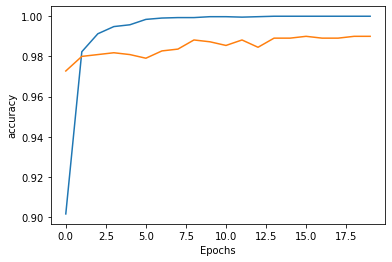

In [25]:
plot_graphs(history, 'accuracy')

In [26]:
model.save(project_path+'model.h5')

In [27]:
text = "Dear Candidate,We are pleased to invite to our live webinar on Careers in AI & Machine Learning, Today (15-July) @ 3 PM Register Now: bit.ly/2ODEe57"
tokenized_text = tokenizer.texts_to_sequences([text])[0]
tokenized_text = pad_sequences([tokenized_text], maxlen = max_sequence_len-1, padding='post')
tokenized_text = np.array(tokenized_text)
predicted = model.predict(tokenized_text, verbose=0)
if predicted > 0.5:
    print("Spam")
else:
    print("Not Spam")

Spam


In [28]:
import pickle

# saving
with open(project_path + 'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:
i = 900
print(model.predict(test_sequence)[i])
print(test_label[i])

[0.00079498]
0


In [34]:
i = 900
seq = test_sequence[i]
text = tokenizer.sequences_to_texts([seq])
print(text)
print(test_msg[i])

['this is wishing you a great day moji told me about your offer and as always i was speechless you offer so easily to go to great _oov_ on my _oov_ and its _oov_ my exam is next friday after that i will keep in touch more sorry _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov_ _oov